In [12]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading the contents of the CSV

In [2]:
data = pd.read_csv("salary.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
data.shape

(32561, 15)

# Data types and other info about the various columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Description of numeric columns

In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Number of unique elements in each feature

In [5]:
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

# Replacing the dependent variables with binary (0s and 1s) 

In [6]:
data = data.replace([">50K", "<=50K"], [0, 1], regex = True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


# Checking the total count distribution of each dependent variable

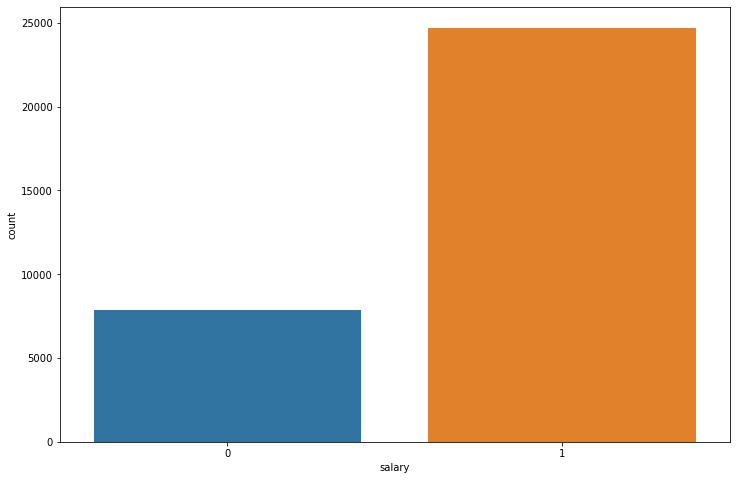

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(data["salary"])
plt.show()

Here we find that the data is not balance and there are more 1s than 0s and the difference between their counts is huge

# Balancing the dependent variables using undersampling

In [16]:
count1, count0 = data.salary.value_counts()
data0 = data[data['salary'] == 0]
data1 = data[data['salary'] == 1]
data1_under = data1.sample(count0)
newData = pd.concat([data1_under, data0], axis=0)

# Count after balancing

In [17]:
print(newData.salary.value_counts())

1    7841
0    7841
Name: salary, dtype: int64


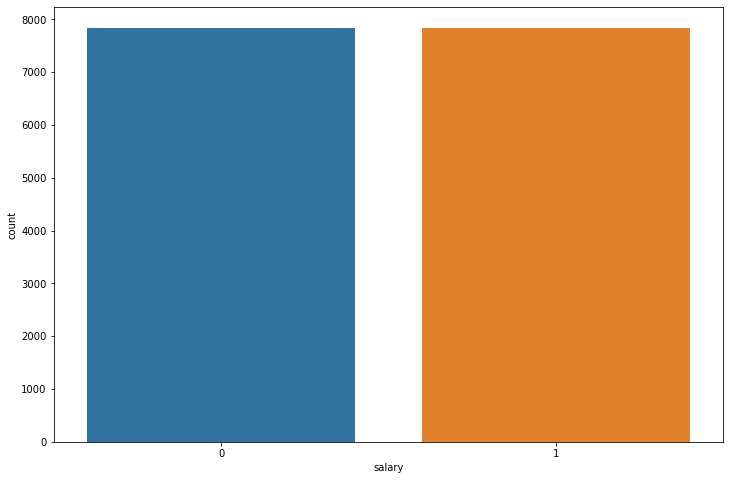

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(newData["salary"])
plt.show()

# Finding the distribution of each feature with others, and looking for outliers

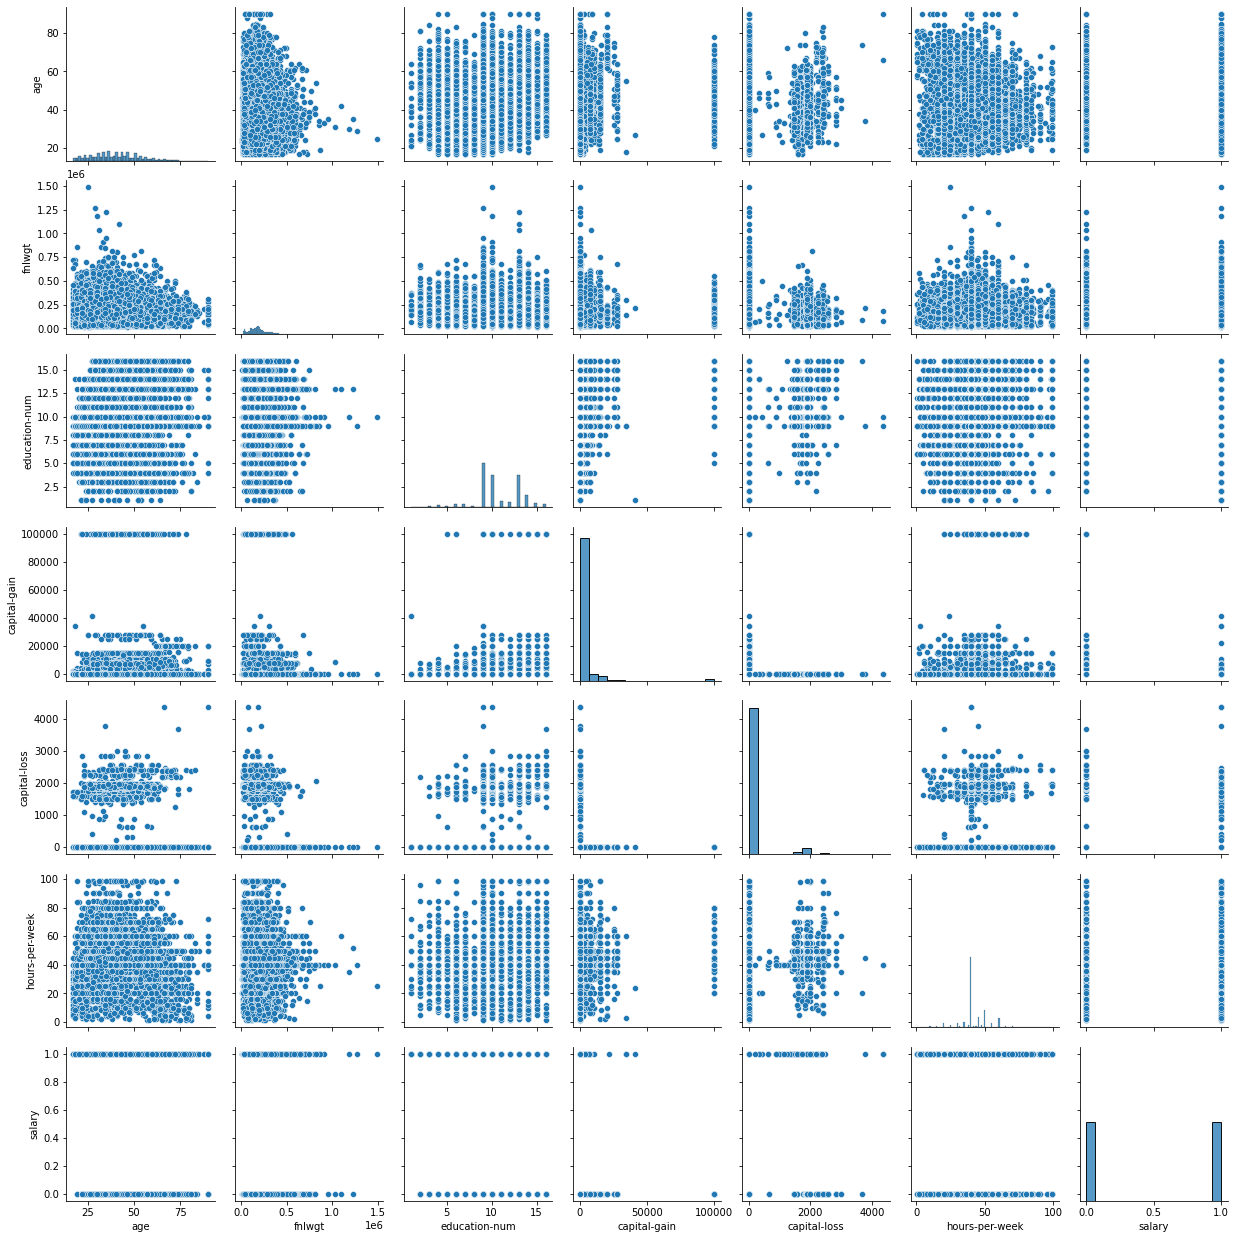

In [20]:
sns.pairplot(newData)

In [21]:
newData.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
24982,20,Private,148409,Some-college,10,Never-married,Sales,Other-relative,White,Male,1055,0,20,United-States,1
5292,21,Private,143604,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,8,United-States,1
16982,51,Private,160703,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,1
19839,23,Private,186813,HS-grad,9,Never-married,Protective-serv,Own-child,Amer-Indian-Eskimo,Male,0,0,40,United-States,1
31890,46,Private,128645,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,1


# Checking for null values in the columns

In [22]:
newData.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

# Storing categorical column names and numerical column names in 2 separate lists

In [23]:
cat = []
num = []
li = list(newData.columns)
for i in li:
    if newData[i].dtype == "object":
        cat.append(i)
    else:
        num.append(i)
for i in cat:
    print(newData[i].unique())

[' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' ?'
 ' State-gov' ' Self-emp-inc' ' Never-worked' ' Without-pay']
[' Some-college' ' 12th' ' HS-grad' ' 11th' ' Masters' ' Bachelors'
 ' Assoc-voc' ' 1st-4th' ' 7th-8th' ' 9th' ' 10th' ' Assoc-acdm'
 ' 5th-6th' ' Doctorate' ' Prof-school' ' Preschool']
[' Never-married' ' Married-civ-spouse' ' Divorced' ' Separated'
 ' Widowed' ' Married-spouse-absent' ' Married-AF-spouse']
[' Sales' ' Craft-repair' ' Protective-serv' ' Prof-specialty'
 ' Other-service' ' Exec-managerial' ' Adm-clerical' ' Handlers-cleaners'
 ' Farming-fishing' ' ?' ' Transport-moving' ' Priv-house-serv'
 ' Machine-op-inspct' ' Tech-support' ' Armed-Forces']
[' Other-relative' ' Own-child' ' Husband' ' Not-in-family' ' Wife'
 ' Unmarried']
[' White' ' Amer-Indian-Eskimo' ' Black' ' Asian-Pac-Islander' ' Other']
[' Male' ' Female']
[' United-States' ' South' ' Mexico' ' ?' ' Dominican-Republic'
 ' Puerto-Rico' ' Canada' ' Cuba' ' Columbia' ' Trinadad&Tobago'
 

# Replacing "?" with NaN
we use "\?" for the regex to match with the question mark

In [24]:
newData = newData.replace("\?", np.nan, regex=True)

# Dividing data into X and y

In [25]:
X = newData.iloc[:, :-1].values
y = newData.iloc[:, -1].values

# Replacing the nan values

In [26]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
si.fit(X[:, :15])
X[:, :15] = si.transform(X[:, :15])

# Replacing the categorical values

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder = "passthrough")
X = (ct.fit_transform(X)).toarray()

# Splitting X and y into train and test sets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Training Models

In [45]:
from sklearn.linear_model import LogisticRegression
clf_log=LogisticRegression()
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)

In [47]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf_log, X_train, y_train, cv=10)
print(acc.mean())

0.8216834099010656


<AxesSubplot:ylabel='Density'>

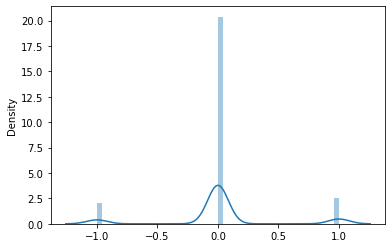

In [48]:
sns.distplot(y_test-y_pred_log)

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_log, y_test))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1639
           1       0.80      0.83      0.81      1498

    accuracy                           0.82      3137
   macro avg       0.82      0.82      0.82      3137
weighted avg       0.82      0.82      0.82      3137



In [50]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100, criterion = "entropy")
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)

In [51]:
acc1 = cross_val_score(rf, X_train, y_train, cv=10)
print(acc1.mean())

0.8217615026338029


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_predrf, y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1622
           1       0.79      0.81      0.80      1515

    accuracy                           0.81      3137
   macro avg       0.81      0.81      0.81      3137
weighted avg       0.81      0.81      0.81      3137



In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predrf,y_test)

0.8061842524705132

In [54]:
accuracy_score(y_pred_log,y_test)

0.8154287535862289